In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score

In [96]:
# Load dataset
data = pd.read_csv("./student_depression_dataset.csv")
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [98]:
data.shape

(27901, 18)

# Preprocessing

## Column renaming

In [99]:
data.columns = (
    data.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_', regex=False)
    .str.replace('?', '', regex=False)
)

In [100]:
print(data.columns.tolist())

['id', 'gender', 'age', 'city', 'profession', 'academic_pressure', 'work_pressure', 'cgpa', 'study_satisfaction', 'job_satisfaction', 'sleep_duration', 'dietary_habits', 'degree', 'have_you_ever_had_suicidal_thoughts_', 'work/study_hours', 'financial_stress', 'family_history_of_mental_illness', 'depression']


In [101]:
data.rename(columns={'have_you_ever_had_suicidal_thoughts_': 'suicidal_thoughts' ,'family_history_of_mental_illness' : 'illness_history' }, inplace=True)

## checking for unique values in every column

In [102]:
for col in data.columns:
    print(f"{col}: {data[col].unique()}")

id: [     2      8     26 ... 140689 140690 140699]
gender: ['Male' 'Female']
age: [33. 24. 31. 28. 25. 29. 30. 27. 19. 20. 23. 18. 21. 22. 34. 32. 26. 39.
 35. 42. 36. 58. 49. 38. 51. 44. 43. 46. 59. 54. 48. 56. 37. 41.]
city: ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' "'Less Delhi'" 'City'
 '3.0' "'Less than 5 Kalyan'" 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh'
 'Reyansh' 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini'
 'Nandini' 'Khaziabad']
profession: ['Student' "'Civil Engineer'" 'Architect' "'UX/UI Designer'"
 "'Digital Marketer'" "'Content Writer'" "'Educational Consultant'"
 'Teacher' 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']
academic_pressure: [5. 2. 3. 4. 1. 0.]


## removing extra quotes

In [103]:
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].str.strip("'").str.strip()


In [104]:
for col in data.columns:
    print(f"{col}: {data[col].unique()}")

id: [     2      8     26 ... 140689 140690 140699]
gender: ['Male' 'Female']
age: [33. 24. 31. 28. 25. 29. 30. 27. 19. 20. 23. 18. 21. 22. 34. 32. 26. 39.
 35. 42. 36. 58. 49. 38. 51. 44. 43. 46. 59. 54. 48. 56. 37. 41.]
city: ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'City' '3.0'
 'Less than 5 Kalyan' 'Mira' 'Harsha' 'Vaanya' 'Gaurav' 'Harsh' 'Reyansh'
 'Kibara' 'Rashi' 'ME' 'M.Com' 'Nalyan' 'Mihir' 'Nalini' 'Nandini'
 'Khaziabad']
profession: ['Student' 'Civil Engineer' 'Architect' 'UX/UI Designer'
 'Digital Marketer' 'Content Writer' 'Educational Consultant' 'Teacher'
 'Manager' 'Chef' 'Doctor' 'Lawyer' 'Entrepreneur' 'Pharmacist']
academic_pressure: [5. 2. 3. 4. 1. 0.]
work_pressure:

## Sleep duration

### sleep duratin mapping

In [105]:
sleep_map = {
    "Less than 5 hours": 0,
    "5-6 hours": 1,
    "7-8 hours": 2,
    "More than 8 hours": 3,
    "Others": 4
}

data['sleep_duration'] = data['sleep_duration'].map(sleep_map)


In [106]:
print(sorted(data['sleep_duration'].unique()))

[0, 1, 2, 3, 4]


## Binary mapping

In [107]:
binary_map = {'Yes': 1, 'No': 0}
data['suicidal_thoughts'] = data['suicidal_thoughts'].map(binary_map)
data['illness_history'] = data['illness_history'].map(binary_map)

In [108]:
print(data['suicidal_thoughts'].unique())

[1 0]


In [109]:
print(data['illness_history'].unique())

[0 1]


In [110]:
unmapped_values = data[data['sleep_duration'].isna()]
print(unmapped_values)
unmapped_values = data[data['suicidal_thoughts'].isna()]
print(unmapped_values)
unmapped_values = data[data['illness_history'].isna()]
print(unmapped_values)

Empty DataFrame
Columns: [id, gender, age, city, profession, academic_pressure, work_pressure, cgpa, study_satisfaction, job_satisfaction, sleep_duration, dietary_habits, degree, suicidal_thoughts, work/study_hours, financial_stress, illness_history, depression]
Index: []
Empty DataFrame
Columns: [id, gender, age, city, profession, academic_pressure, work_pressure, cgpa, study_satisfaction, job_satisfaction, sleep_duration, dietary_habits, degree, suicidal_thoughts, work/study_hours, financial_stress, illness_history, depression]
Index: []
Empty DataFrame
Columns: [id, gender, age, city, profession, academic_pressure, work_pressure, cgpa, study_satisfaction, job_satisfaction, sleep_duration, dietary_habits, degree, suicidal_thoughts, work/study_hours, financial_stress, illness_history, depression]
Index: []


## Label Encoding for categorical features

In [111]:
for col in ['gender', 'dietary_habits', 'degree']:
    data[col] = LabelEncoder().fit_transform(data[col])

## Drop unneeded columns

In [112]:
data.drop(['id', 'city', 'profession'], axis=1, inplace=True)

## Numerical columns treatment

In [113]:
num_cols = ['age', 'academic_pressure', 'work_pressure', 'cgpa',
            'study_satisfaction', 'job_satisfaction', 'work/study_hours', 'financial_stress']

In [114]:
for col in num_cols:
    data[col] = data[col].replace('?', np.nan)  # Replace ? with NaN
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Ensure float dtype


In [115]:
for col in num_cols:
    print(f"{col}: {data[col].unique()}")

age: [33. 24. 31. 28. 25. 29. 30. 27. 19. 20. 23. 18. 21. 22. 34. 32. 26. 39.
 35. 42. 36. 58. 49. 38. 51. 44. 43. 46. 59. 54. 48. 56. 37. 41.]
academic_pressure: [5. 2. 3. 4. 1. 0.]
work_pressure: [0. 5. 2.]
cgpa: [ 8.97    5.9     7.03    5.59    8.13    5.7     9.54    8.04    9.79
  8.38    6.1     7.04    8.52    5.64    8.58    6.51    7.25    7.83
  9.93    8.74    6.73    5.57    8.59    7.1     6.08    5.74    9.86
  6.7     6.21    5.87    6.37    9.72    5.88    9.56    6.99    5.24
  9.21    7.85    6.95    5.86    7.92    9.66    8.94    9.71    7.87
  5.6     7.9     5.46    6.79    8.7     7.38    8.5     7.09    9.82
  8.89    7.94    9.11    6.75    7.53    9.49    9.01    7.64    5.27
  6.      9.44    5.75    7.51    9.05    6.38    8.95    9.88    5.32
  6.27    7.7     8.1     9.59    8.96    5.51    7.43    8.79    9.95
  5.37    6.86    8.32    9.74    5.66    7.48    8.23    8.81    6.03
  5.56    5.68    5.14    7.61    6.17    8.17    9.87    8.75    6.16
  9.

In [116]:
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

### ! DO NOT RUN YET AND LETS SEE TODO !

In [117]:
# scaler = StandardScaler()
# data[num_cols] = scaler.fit_transform(data[num_cols])

## Categorical features treatment

In [118]:
#Which columns are still non-numeric (categorical)?
data.select_dtypes(include='object').columns

Index([], dtype='object')

In [119]:
for col in data.columns:
    print(f"{col}: {data[col].unique()}")

gender: [1 0]
age: [33. 24. 31. 28. 25. 29. 30. 27. 19. 20. 23. 18. 21. 22. 34. 32. 26. 39.
 35. 42. 36. 58. 49. 38. 51. 44. 43. 46. 59. 54. 48. 56. 37. 41.]
academic_pressure: [5. 2. 3. 4. 1. 0.]
work_pressure: [0. 5. 2.]
cgpa: [ 8.97    5.9     7.03    5.59    8.13    5.7     9.54    8.04    9.79
  8.38    6.1     7.04    8.52    5.64    8.58    6.51    7.25    7.83
  9.93    8.74    6.73    5.57    8.59    7.1     6.08    5.74    9.86
  6.7     6.21    5.87    6.37    9.72    5.88    9.56    6.99    5.24
  9.21    7.85    6.95    5.86    7.92    9.66    8.94    9.71    7.87
  5.6     7.9     5.46    6.79    8.7     7.38    8.5     7.09    9.82
  8.89    7.94    9.11    6.75    7.53    9.49    9.01    7.64    5.27
  6.      9.44    5.75    7.51    9.05    6.38    8.95    9.88    5.32
  6.27    7.7     8.1     9.59    8.96    5.51    7.43    8.79    9.95
  5.37    6.86    8.32    9.74    5.66    7.48    8.23    8.81    6.03
  5.56    5.68    5.14    7.61    6.17    8.17    9.87    8.7

# Data Understanding

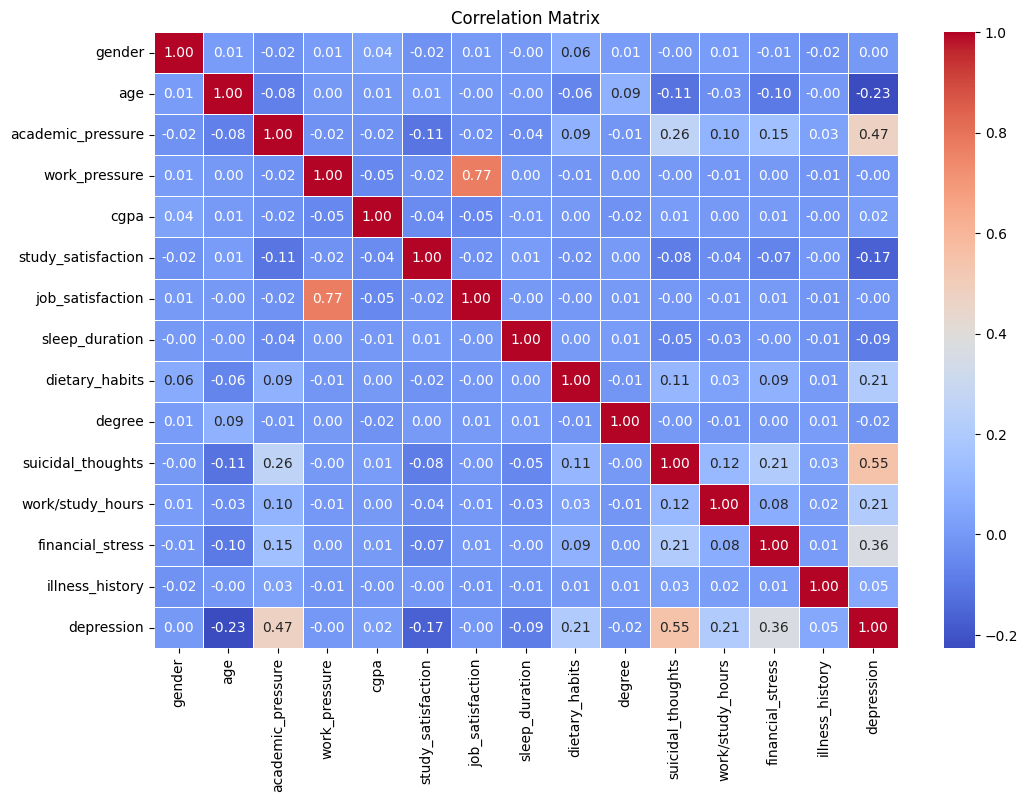

In [120]:
# Calculate correlation matrix
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [121]:
data = data.drop(columns=['gender', 'work_pressure', 'job_satisfaction'])

print(data.columns)

Index(['age', 'academic_pressure', 'cgpa', 'study_satisfaction',
       'sleep_duration', 'dietary_habits', 'degree', 'suicidal_thoughts',
       'work/study_hours', 'financial_stress', 'illness_history',
       'depression'],
      dtype='object')


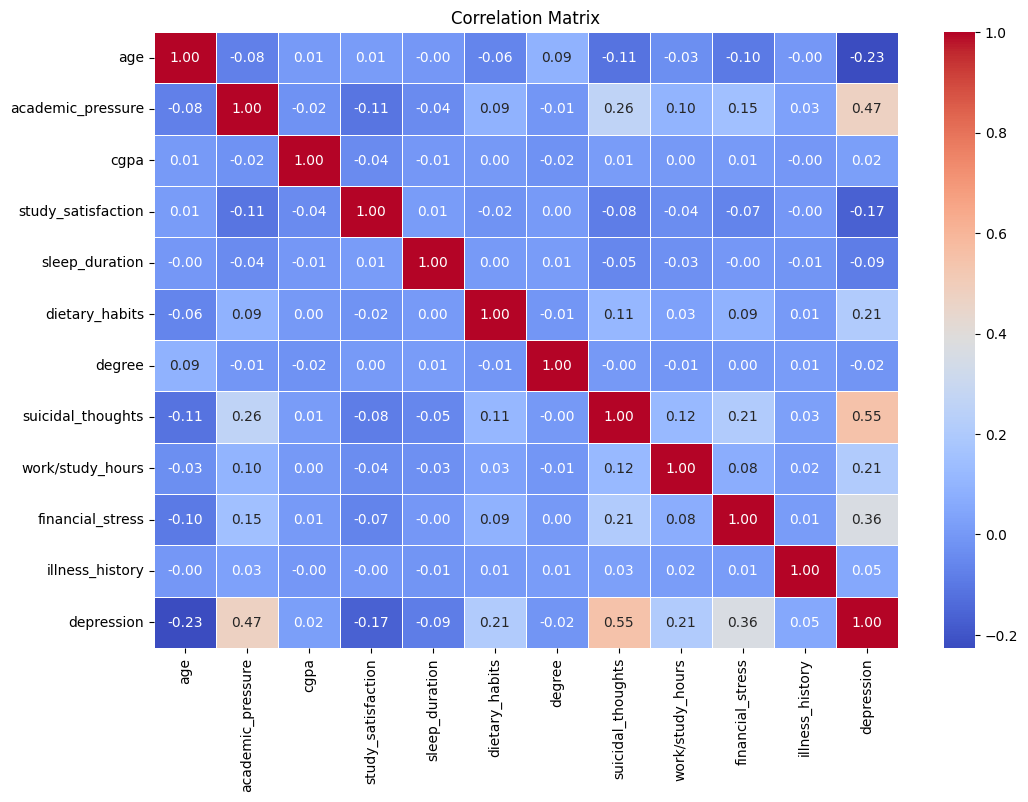

In [122]:
# Calculate correlation matrix
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [123]:
data['academic_stress_combo'] = data['academic_pressure'] * data['financial_stress']
data['burnout_index'] = data['academic_pressure'] * data['work/study_hours']
data['wellness_score'] = data['study_satisfaction'] + data['sleep_duration'] + data['dietary_habits']


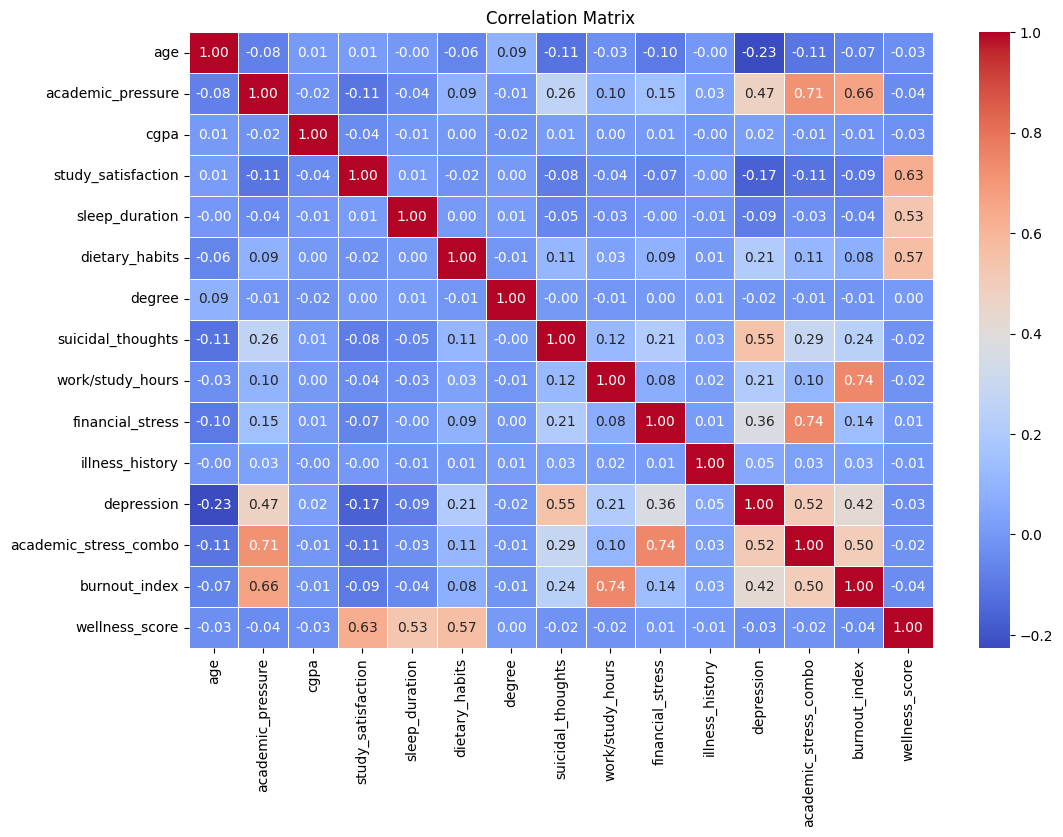

In [124]:
# Calculate correlation matrix
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Model Training

## Spliting data

In [125]:
# Separate features (X) and target (y)
X = data.drop(columns=["depression"])
y = data["depression"]
# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Grid search with cross-validation
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Best model
best_rf = grid_rf.best_estimator_
print("Best Random Forest Params:", grid_rf.best_params_)

Best Random Forest Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


In [128]:
# Predictions
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]  # Probabilities for AUC

# Metrics
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print(f"AUC Score: {roc_auc_score(y_test, y_proba_rf):.4f}")

Random Forest Results:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2343
           1       0.84      0.88      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.83      5581

AUC Score: 0.9103


In [130]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.4f}")

# Alternatively, you can also get it from the classification report
# The 'accuracy' is the last value in the classification report's output

Accuracy: 0.8357


In [131]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_proba_rf)

# Perform cross-validation on best model
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='accuracy')

# Print all results
print("=== Model Evaluation Metrics ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("\n=== Cross-Validation Results ===")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"CV Accuracy Scores: {cv_scores}")
print(f"Standard Deviation: {cv_scores.std():.4f}")
print("\nBest Parameters:", grid_rf.best_params_)

=== Model Evaluation Metrics ===
Accuracy: 0.8357
ROC AUC: 0.9103

=== Cross-Validation Results ===
Mean CV Accuracy: 0.8462
CV Accuracy Scores: [0.85013441 0.84363799 0.84498208 0.84431004 0.84811828]
Standard Deviation: 0.0025

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


In [132]:
cv_auc_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='roc_auc')
print(f"\nMean CV ROC AUC: {cv_auc_scores.mean():.4f}")
print(f"CV ROC AUC Scores: {cv_auc_scores}")


Mean CV ROC AUC: 0.9200
CV ROC AUC Scores: [0.92517055 0.913412   0.9204687  0.9178818  0.92300136]
